In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
faults = pd.read_csv("../data/J1939Faults.csv")
faults.head()

C:\Users\nitin\AppData\Local\Temp\ipykernel_7492\3681478151.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  faults = pd.read_csv("../data/J1939Faults.csv")


,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000


In [3]:
faults[(faults['spn'] == 5246)]['fmi'].unique()

array([ 0, 15, 16, 19, 14], dtype=int64)

In [4]:
#removed rows from certina long and latititue . Lets go with 80 kms using haverson.
# Locations to drop around
drop_locations = [
    (36.0666667, -86.4347222),
    (35.5883333, -86.4438888),
    (36.1950, -83.174722)
]

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the distance in kilometers between two points on Earth 
    specified by their longitudes and latitudes in decimal degrees.
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 
    return c * r

# Mark rows to drop
radius_km = 80 #50 miles radius
def is_near_any(row, locations, radius):
    for lat, lon in locations:
        if haversine(row['Latitude'], row['Longitude'], lat, lon) <= radius:
            return True
    return False

# Apply and filter
faults['drop'] = faults.apply(lambda row: is_near_any(row, drop_locations, radius_km), axis=1)
faults_cleaned = faults[~faults['drop']].drop(columns='drop')

In [5]:
faults_cleaned

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187329,1248453,123901925,2020-03-06 13:44:45.000,Low (Severity Medium) Engine Coolant Level,NaN,04358814*06030918*051718174436*09401683*G1*BDR*,79904453,6X1u13D1500000000,CMMNS,0,111,18,False,93,NaN,1886,105351219,39.013472,-77.037685,2020-03-06 13:44:41.000
1187331,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1187332,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1187333,1248457,123906113,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [6]:
faults_selected = faults_cleaned[['RecordID','EventTimeStamp','eventDescription','spn','fmi','active','activeTransitionCount','EquipmentID','Latitude','Longitude','LocationTimeStamp']]
faults_selected.head()

,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,LocationTimeStamp
0,1,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,111,17,True,2,1439,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,2015-02-21 11:34:34.000,NaN,629,12,True,127,1439,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,1807,2,False,127,1369,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,1807,2,True,127,1369,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,2015-02-21 11:39:41.000,NaN,4364,17,False,2,1674,38.416481,-89.442638,2015-02-21 11:39:37.000


In [7]:
faults_cleaned[(faults_selected['EquipmentID'] == 1331)]['spn'].unique()

array([  596,   101, 50353], dtype=int64)

In [8]:
diagnostics = pd.read_csv("../data/VehicleDiagnosticOnboardData.csv")

diagnostics.head()

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1


In [9]:
diag_pivoted = diagnostics.pivot(index='FaultId', columns='Name', values='Value').reset_index()

In [10]:
diag_pivoted

Name,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1187331,1248455,100,14.5,True,64.6226,423937.9,185,51,37.12,211.4937,...,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1187332,1248456,0,14.355,True,66.48672,465925.4,186.8,62,41.18,212.8438,...,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
1187333,1248457,1.6,14.4275,False,67.72946,28606.65625,181.4,0,27.26,221.7312,...,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [11]:
#Lets merge faults and diagnosis
faults_diag_merged = pd.merge(faults_selected, diag_pivoted, how='left', left_on='RecordID', right_on='FaultId')
faults_diag_merged

,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,111,17,True,2,1439,38.857638,-84.626851,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,2015-02-21 11:34:34.000,NaN,629,12,True,127,1439,38.857638,-84.626851,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,1807,2,False,127,1369,41.421250,-87.767361,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,1807,2,True,127,1369,41.421018,-87.767361,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2015-02-21 11:39:41.000,NaN,4364,17,False,2,1674,38.416481,-89.442638,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737592,1248453,2020-03-06 13:44:45.000,Low (Severity Medium) Engine Coolant Level,111,18,False,93,1886,39.013472,-77.037685,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
737593,1248455,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,1569,31,True,5,1994,34.390740,-79.461805,...,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
737594,1248456,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,3216,10,True,1,1850,34.430370,-84.920509,...,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
737595,1248457,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,111,18,True,8,2377,35.030925,-85.321527,...,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [12]:
#convert time stamp from object to date
faults_diag_merged['EventTimeStamp'] = pd.to_datetime(faults_diag_merged['EventTimeStamp'],errors='coerce')
faults_diag_merged['LocationTimeStamp'] = pd.to_datetime(faults_diag_merged['LocationTimeStamp'],errors='coerce')
faults_diag_merged

,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,111,17,True,2,1439,38.857638,-84.626851,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,2015-02-21 11:34:34,NaN,629,12,True,127,1439,38.857638,-84.626851,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,1807,2,False,127,1369,41.421250,-87.767361,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,1807,2,True,127,1369,41.421018,-87.767361,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2015-02-21 11:39:41,NaN,4364,17,False,2,1674,38.416481,-89.442638,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737592,1248453,2020-03-06 13:44:45,Low (Severity Medium) Engine Coolant Level,111,18,False,93,1886,39.013472,-77.037685,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
737593,1248455,2020-03-06 14:04:23,Condition Exists Engine Protection Torque Derate,1569,31,True,5,1994,34.390740,-79.461805,...,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
737594,1248456,2020-03-06 14:13:38,Abnormal Rate of Change Aftertreatment 1 Intak...,3216,10,True,1,1850,34.430370,-84.920509,...,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
737595,1248457,2020-03-06 14:14:13,Low (Severity Medium) Engine Coolant Level,111,18,True,8,2377,35.030925,-85.321527,...,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [13]:
# faults_targetted = faults_diag_merged[faults_diag_merged['EquipmentID']
# .isin(list(faults_diag_merged[ (faults_diag_merged['spn'] == 5246) & 
#            (faults_diag_merged['active'] == True) &
#            (faults_diag_merged['EventTimeStamp'] <= '2018-12-31')]['EquipmentID']
#            .unique()))]
# Lets take data before 12/31/2018 as training data and build on top of that
faults_targetted = faults_diag_merged[(faults_diag_merged['EventTimeStamp'] <= '2018-12-31')]

# Sort just to be safe
temp_sort_df = faults_targetted.sort_values(by=['EquipmentID', 'EventTimeStamp'])

# List to collect all event frames
all_events = []

# Loop through each TruckID
for truck_id, truck_df in temp_sort_df.groupby('EquipmentID'):
    truck_df = truck_df.sort_values('EventTimeStamp')
    
    # Find 5246 occurrences
    hits_5246 = truck_df[truck_df['spn'] == 5246]['EventTimeStamp'].reset_index(drop=True)
    
    event_counter = 1  # Reset counter for each truck

    for i, current_hit_time in enumerate(hits_5246):
        # Window: last 24 hours including current hit
        window_start = current_hit_time - pd.Timedelta(hours=14)

        # Find if any previous 5246 in that window
        previous_5246 = hits_5246[hits_5246 < current_hit_time]
        previous_5246_in_window = previous_5246[previous_5246 >= window_start]

        if not previous_5246_in_window.empty:
            # If previous 5246 found within window, start from that
            adjusted_start_time = previous_5246_in_window.max()
        else:
            # Otherwise normal 24-hour window
            adjusted_start_time = window_start
        
        mask = (truck_df['EventTimeStamp'] >= adjusted_start_time) & (truck_df['EventTimeStamp'] <= current_hit_time) & (truck_df['active'] == True)
        window_df = truck_df[mask].copy()

        # Drop if only 5246 exists in window
        if window_df['spn'].nunique() == 1 and (5246 in window_df['spn'].unique()):
            # Only 5246 present → Skip this window
            continue

        # Sort by Time just to be safe
        window_df = window_df.sort_values('EventTimeStamp')

        # De-duplication: Check (spn, Latitude, Longitude) against ALL previous
        seen = set()
        deduped_rows = []

        for idx, row in window_df.iterrows():
            key = (row['spn'], row['Latitude'], row['Longitude'])
            if key not in seen:
                seen.add(key)
                deduped_rows.append(row)

        # Create cleaned DataFrame
        deduped_window_df = pd.DataFrame(deduped_rows)
        
        # Label the Event
        deduped_window_df['Event'] = f"{truck_id}_5246_Event#{event_counter}"
        
        all_events.append(deduped_window_df)
        
        event_counter += 1

# Combine all events together
final_df = pd.concat(all_events, ignore_index=True)

# Drop exact duplicates across events
final_df = final_df.drop_duplicates(subset=['EventTimeStamp', 'spn', 'Latitude', 'Longitude'])

# Get the 5246 times for each Event
event_5246_times = final_df[final_df['spn'] == 5246].groupby('Event')['EventTimeStamp'].min()

# Merge that info back into final_df
final_df['Event_5246_Time'] = final_df['Event'].map(event_5246_times)

# Now calculate Hours Before 5246
final_df['Hours_Before_5246'] = (final_df['Event_5246_Time'] - final_df['EventTimeStamp']).dt.total_seconds() / 3600


# print("\nFinal Data with Event Labels:")
# #print(final_df)

# # # Now Pivot: Create summary table
# pivot_wider = final_df.pivot_table(
#     index='Event',
#     columns='spn',
#     values='EquipmentID',  # any non-null field works
#     aggfunc='count',
#     fill_value=0
# )

# Group by TruckID, Event, and Code
# summary_df = final_df.groupby(['EquipmentID', 'Event', 'spn']).size().reset_index(name='Count')
# summary_df

In [14]:
final_df

,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,Event,Event_5246_Time,Hours_Before_5246
0,383326.0,2016-02-14 23:23:02,Incorrect Data J1939 Network #4,1668.0,2.0,True,1.0,304,38.099537,-85.700787,...,17407,False,NaN,63.61288,NaN,19.2,6.67,304_5246_Event#1,NaT,NaN
1,383333.0,2016-02-14 23:49:05,Error in System Engine Torque Limit Request - ...,1787.0,11.0,True,22.0,304,38.343796,-85.709166,...,18431,False,NaN,37.82597,NaN,42,15.95,304_5246_Event#1,NaT,NaN
2,383334.0,2016-02-14 23:49:05,Special Instructions Catalyst Tank Level,1761.0,14.0,True,20.0,304,38.343750,-85.709027,...,18431,False,NaN,37.82597,NaN,42,15.95,304_5246_Event#1,NaT,NaN
3,383340.0,2016-02-15 00:01:08,Error in System Engine Exhaust Gas Recirculati...,3821.0,11.0,True,7.0,304,38.348703,-85.709259,...,17407,True,NaN,0,NaN,0,1.74,304_5246_Event#1,NaT,NaN
4,383342.0,2016-02-15 00:12:10,Data May Be Invalid Catalyst Tank Level,1761.0,19.0,True,50.0,304,38.349074,-85.709629,...,255,True,NaN,0,NaN,0,1.45,304_5246_Event#1,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,1029508.0,2018-06-25 05:40:23,NaN,4765.0,19.0,True,126.0,305,38.136296,-85.711296,...,17407,True,NaN,0,NaN,0,0.29,305_5246_Event#1,2018-06-25 14:48:16,9.131389
1580,1029513.0,2018-06-25 05:40:32,Data May Be Invalid J1939 Network #4,1668.0,19.0,True,126.0,305,38.136203,-85.711527,...,17407,True,NaN,0,NaN,0,0.29,305_5246_Event#1,2018-06-25 14:48:16,9.128889
1581,1029681.0,2018-06-25 12:12:13,High (Severity Medium) Aftertreatment 1 Outlet...,3226.0,16.0,True,3.0,305,37.784768,-85.401111,...,18431,False,NaN,52.40878,NaN,97.6,20.01,305_5246_Event#1,2018-06-25 14:48:16,2.600833
1582,1029757.0,2018-06-25 14:47:46,Special Instructions Maximum Vehicle Speed Limit,74.0,14.0,True,1.0,305,37.644166,-85.348148,...,22527,False,NaN,NaN,NaN,NaN,NaN,305_5246_Event#1,2018-06-25 14:48:16,0.008333


In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 0 to 1583
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   RecordID                   1409 non-null   float64       
 1   EventTimeStamp             1409 non-null   datetime64[ns]
 2   eventDescription           1003 non-null   object        
 3   spn                        1409 non-null   float64       
 4   fmi                        1409 non-null   float64       
 5   active                     1409 non-null   object        
 6   activeTransitionCount      1409 non-null   float64       
 7   EquipmentID                1409 non-null   object        
 8   Latitude                   1409 non-null   float64       
 9   Longitude                  1409 non-null   float64       
 10  LocationTimeStamp          1409 non-null   datetime64[ns]
 11  FaultId                    1409 non-null   float64       
 12  Accelerator

In [16]:
final_df[final_df['EquipmentID'] == 304]

,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,Event,Event_5246_Time,Hours_Before_5246
0,383326.0,2016-02-14 23:23:02,Incorrect Data J1939 Network #4,1668.0,2.0,True,1.0,304,38.099537,-85.700787,...,17407,False,NaN,63.61288,NaN,19.2,6.67,304_5246_Event#1,NaT,NaN
1,383333.0,2016-02-14 23:49:05,Error in System Engine Torque Limit Request - ...,1787.0,11.0,True,22.0,304,38.343796,-85.709166,...,18431,False,NaN,37.82597,NaN,42,15.95,304_5246_Event#1,NaT,NaN
2,383334.0,2016-02-14 23:49:05,Special Instructions Catalyst Tank Level,1761.0,14.0,True,20.0,304,38.343750,-85.709027,...,18431,False,NaN,37.82597,NaN,42,15.95,304_5246_Event#1,NaT,NaN
3,383340.0,2016-02-15 00:01:08,Error in System Engine Exhaust Gas Recirculati...,3821.0,11.0,True,7.0,304,38.348703,-85.709259,...,17407,True,NaN,0,NaN,0,1.74,304_5246_Event#1,NaT,NaN
4,383342.0,2016-02-15 00:12:10,Data May Be Invalid Catalyst Tank Level,1761.0,19.0,True,50.0,304,38.349074,-85.709629,...,255,True,NaN,0,NaN,0,1.45,304_5246_Event#1,NaT,NaN
5,383534.0,2016-02-15 06:38:41,Error in System Engine Exhaust Gas Recirculati...,3821.0,11.0,True,9.0,304,38.348981,-85.709120,...,17407,False,NaN,3.669974,NaN,0.4,0.29,304_5246_Event#1,NaT,NaN
6,383535.0,2016-02-15 06:39:20,Data May Be Invalid Catalyst Tank Level,1761.0,19.0,True,54.0,304,38.348981,-85.709120,...,255,True,NaN,0,NaN,0,0.29,304_5246_Event#1,NaT,NaN
7,383688.0,2016-02-15 08:15:31,Abnormal Update Rate Particulate Trap Lamp Com...,3697.0,9.0,True,63.0,304,38.348703,-85.709398,...,255,True,NaN,0,NaN,0,0,304_5246_Event#1,NaT,NaN
8,383689.0,2016-02-15 08:15:32,Data May Be Invalid Catalyst Tank Level,1761.0,19.0,True,60.0,304,38.348703,-85.709398,...,255,True,NaN,0,NaN,0,0,304_5246_Event#1,NaT,NaN
9,383690.0,2016-02-15 08:15:51,Error in System Engine Exhaust Gas Recirculati...,3821.0,11.0,True,10.0,304,38.348703,-85.709398,...,17407,True,NaN,0,NaN,0,1.16,304_5246_Event#1,NaT,NaN


In [17]:
summary_df = final_df.groupby(['EquipmentID', 'Event', 'spn','fmi']).size().reset_index(name='Count')
summary_df

,EquipmentID,Event,spn,fmi,Count
0,304,304_5246_Event#1,1668.0,2.0,1
1,304,304_5246_Event#1,1761.0,14.0,1
2,304,304_5246_Event#1,1761.0,19.0,3
3,304,304_5246_Event#1,1787.0,11.0,1
4,304,304_5246_Event#1,3697.0,9.0,1
...,...,...,...,...,...
1001,305,305_5246_Event#1,74.0,14.0,1
1002,305,305_5246_Event#1,1668.0,19.0,2
1003,305,305_5246_Event#1,3226.0,16.0,1
1004,305,305_5246_Event#1,4765.0,19.0,2


In [18]:
summary_df[(summary_df['EquipmentID'] == 305) & (summary_df['spn'] != 5246)].head(60)

,EquipmentID,Event,spn,fmi,Count
6,305,305_5246_Event#13,111.0,18.0,1
8,305,305_5246_Event#14,1787.0,11.0,1
9,305,305_5246_Event#15,1787.0,11.0,1
11,305,305_5246_Event#16,1787.0,11.0,1
12,305,305_5246_Event#17,1787.0,11.0,1
14,305,305_5246_Event#18,111.0,18.0,1
16,305,305_5246_Event#2,74.0,14.0,1
17,305,305_5246_Event#2,184.0,9.0,1
18,305,305_5246_Event#2,1787.0,11.0,1
19,305,305_5246_Event#2,4349.0,7.0,1


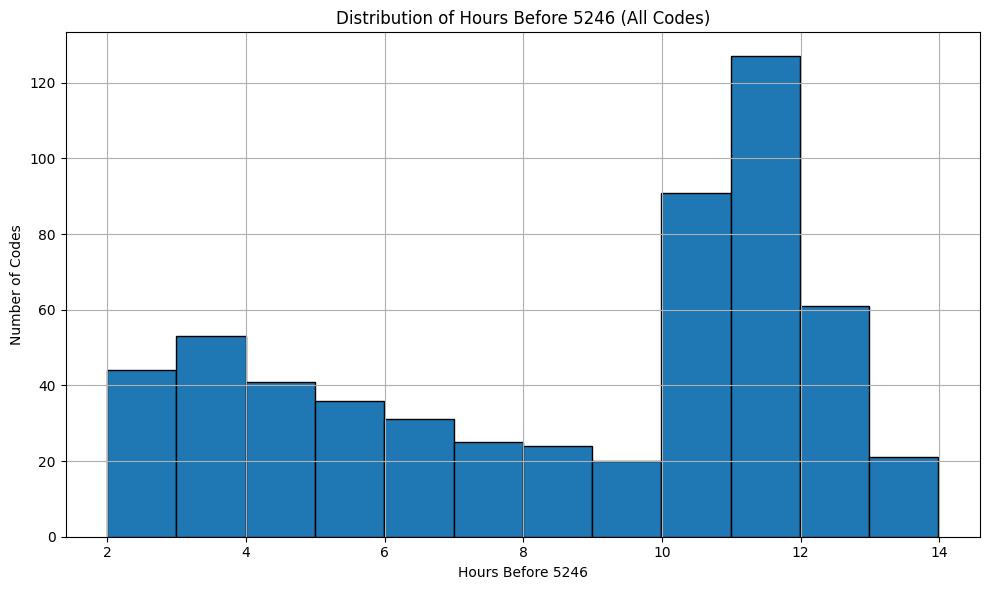

In [19]:
import matplotlib.pyplot as plt

# Only focus on rows that are NOT the 5246 code itself and spn apppeared before 2 hours
hist_data = final_df[(final_df['spn'] != 5246) & (final_df['Hours_Before_5246'] >= 2)]
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(hist_data['Hours_Before_5246'], bins=12, edgecolor='black')

plt.title('Distribution of Hours Before 5246 (All Codes)')
plt.xlabel('Hours Before 5246')
plt.ylabel('Number of Codes')
plt.grid(True)
plt.tight_layout()
plt.show()

## Lets find the early warning spn where they appeared from 2 hours to 12 hours prior to 5246

In [20]:
# Only keep codes that happened BEFORE 5246 (not after)
early_warnings = final_df[(final_df['spn'] != 5246) & (final_df['Hours_Before_5246'] >= 2) & (final_df['Hours_Before_5246'] <= 14)]

# Group by Code
early_indicator_stats = early_warnings.groupby('spn').agg(
    avg_hours_before_5246=('Hours_Before_5246', 'mean'),
    count_occurrences=('Hours_Before_5246', 'count')
).reset_index()

# Sort to find best early indicators:
# First by count (descending), then by avg_hours (descending)
early_indicator_stats = early_indicator_stats.sort_values(
    by=['avg_hours_before_5246','count_occurrences'],
    ascending=[False, False]
)

early_indicator_stats.head()

,spn,avg_hours_before_5246,count_occurrences
3,94.0,12.408611,2
16,829.0,11.143388,96
4,96.0,10.754604,155
50,5745.0,10.045278,1
38,4096.0,9.936806,2


In [21]:
early_warnings

,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,Event,Event_5246_Time,Hours_Before_5246
64,1075523.0,2018-11-05 10:33:04,Abnormal Update Rate J1939 Network #1 Primary ...,639.0,9.0,True,1.0,305,38.192453,-85.707777,...,18431,True,NaN,0,NaN,0,0,305_5246_Event#6,2018-11-05 14:11:23,3.638611
65,1075524.0,2018-11-05 10:33:10,NaN,5742.0,10.0,True,1.0,305,38.192407,-85.707777,...,18431,True,NaN,0,NaN,0,0,305_5246_Event#6,2018-11-05 14:11:23,3.636944
127,214068.0,2015-09-23 04:34:17,NaN,4364.0,18.0,True,1.0,1366,35.886759,-84.218703,...,17407,False,NaN,53.0884,NaN,NaN,26.68,1366_5246_Event#3,2015-09-23 10:28:29,5.903333
128,214072.0,2015-09-23 04:36:59,Condition Exists NOx limits exceeded due to In...,4094.0,31.0,True,1.0,1366,35.869907,-84.259166,...,18431,False,NaN,54.52532,NaN,NaN,12.18,1366_5246_Event#3,2015-09-23 10:28:29,5.858333
129,214277.0,2015-09-23 07:25:22,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1366,35.750509,-84.112037,...,18431,False,NaN,54.34085,NaN,NaN,9.57,1366_5246_Event#3,2015-09-23 10:28:29,3.051944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,1029497.0,2018-06-25 05:00:38,NaN,4765.0,19.0,True,126.0,305,38.349074,-85.709814,...,17407,True,NaN,0,NaN,0,0,305_5246_Event#1,2018-06-25 14:48:16,9.793889
1578,1029499.0,2018-06-25 05:03:22,Data May Be Invalid J1939 Network #4,1668.0,19.0,True,126.0,305,38.348657,-85.709120,...,17407,False,NaN,0,NaN,0,0,305_5246_Event#1,2018-06-25 14:48:16,9.748333
1579,1029508.0,2018-06-25 05:40:23,NaN,4765.0,19.0,True,126.0,305,38.136296,-85.711296,...,17407,True,NaN,0,NaN,0,0.29,305_5246_Event#1,2018-06-25 14:48:16,9.131389
1580,1029513.0,2018-06-25 05:40:32,Data May Be Invalid J1939 Network #4,1668.0,19.0,True,126.0,305,38.136203,-85.711527,...,17407,True,NaN,0,NaN,0,0.29,305_5246_Event#1,2018-06-25 14:48:16,9.128889


In [22]:
#top 5 spn codes per event

# Step 1: Group by TruckID, Event, and Code, and count
event_code_counts = early_warnings.groupby(['EquipmentID', 'Event', 'spn']).size().reset_index(name='Count')

# Step 2: For each Event, get Top 5 Codes
# Sort first by TruckID, Event, Count descending
event_code_counts = event_code_counts.sort_values(['EquipmentID', 'Event', 'Count'], ascending=[True, True, False])

# Step 3: Rank codes within each event
event_code_counts['Rank'] = event_code_counts.groupby(['EquipmentID', 'Event'])['Count'].rank(method='first', ascending=False)

# Step 4: Filter only top 5 per Event
top_codes_per_event = event_code_counts[event_code_counts['Rank'] <= 10]

top_codes_per_event

,EquipmentID,Event,spn,Count,Rank
0,305,305_5246_Event#6,639.0,1,1.0
1,305,305_5246_Event#6,5742.0,1,2.0
2,1366,1366_5246_Event#3,1569.0,1,1.0
3,1366,1366_5246_Event#3,4094.0,1,2.0
4,1366,1366_5246_Event#3,4364.0,1,3.0
...,...,...,...,...,...
232,1878,1878_5246_Event#1,1569.0,2,3.0
234,1878,1878_5246_Event#1,3031.0,1,4.0
236,305,305_5246_Event#1,1668.0,2,1.0
238,305,305_5246_Event#1,4765.0,2,2.0


## Lets join spn-fmi combination to the service fault code  description

In [23]:
spn_fmi_df = early_warnings[(early_warnings['spn'] != 5246)][['spn','fmi']].value_counts().reset_index(name='Count').rename(columns={'index': 'spn'}).sort_values(by='Count', ascending=False)
spn_fmi_df = spn_fmi_df.astype('int32')
spn_fmi_df = spn_fmi_df.drop('Count',axis=1)
spn_fmi_df.drop_duplicates()
spn_fmi_df

,spn,fmi
0,96,3
1,1569,31
2,829,3
3,111,17
4,1068,2
...,...,...
50,3364,18
51,3361,2
52,91,9
53,171,9


In [24]:
sfc = pd.read_excel("../data/Service Fault Codes_1_0_0_167.xlsx")
sfc2 = sfc[['SPN','J1939 FMI','Lamp Color','Lamp Device','Cummins Description']]
sfc2 = sfc2.rename(columns={"SPN": "spn", "J1939 FMI": "fmi"})
sfc2

C:\Users\nitin\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,spn,fmi,Lamp Color,Lamp Device,Cummins Description
0,629,12,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...
1,635,7,Red,Stop / Shutdown,Engine Timing Actuator Driver Circuit - Mechan...
2,635,3,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...
3,635,4,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...
4,612,2,Red,Stop / Shutdown,Engine Magnetic Speed/Position Lost Both of Tw...
...,...,...,...,...,...
7119,524286,31,Amber,Warning,Reserved for temporary use - Condition Exists
7120,524286,31,Amber,Warning,Reserved for temporary use - Condition Exists
7121,524286,31,Amber,Warning,Reserved for temporary use - Condition Exists
7122,524286,31,Amber,Warning,Reserved for temporary use - Condition Exists


## Lets remove the spn -fmi combincation which are low and maintainance level
Remove spn = 524287,fmi=31,Amber,Warning,Reserved for future use - Condition Exists, 
dropped all maintainance level codes

In [25]:
sfc2 = sfc2[~((sfc2['Lamp Color'] == 'Maintenance'))]
#sfc2.to_csv('newspn.csv',index=False)
sfc2 = sfc2[~(sfc2['spn'].isin([524286,524287,520290]))]
sfc2

,spn,fmi,Lamp Color,Lamp Device,Cummins Description
0,629,12,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...
1,635,7,Red,Stop / Shutdown,Engine Timing Actuator Driver Circuit - Mechan...
2,635,3,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...
3,635,4,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...
4,612,2,Red,Stop / Shutdown,Engine Magnetic Speed/Position Lost Both of Tw...
...,...,...,...,...,...
6399,609,12,Red,Stop / Shutdown,Fuel Control Module - Bad Intelligent Device o...
6400,3597,2,Amber,Warning,Fuel Control Module Power Lost With Ignition O...
6401,168,18,Amber,Warning,Fuel Control Module Battery 1 Voltage - Data V...
6402,2791,15,NaN,NaN,EGR Valve Control Circuit Calculated Over Temp...


In [26]:
sfc2 = sfc2.merge(spn_fmi_df, how='inner', on=['spn','fmi'])
#sfc2.to_csv('spnfmi.csv', index=False)
sfc2

,spn,fmi,Lamp Color,Lamp Device,Cummins Description
0,639,2,Amber,Warning,"J1939 Network #1 - Data Erratic, Intermittent,..."
1,111,18,Amber,Warning,Coolant Level - Data Valid But Below Normal Op...
2,111,1,Red,Stop / Shutdown,Coolant Level - Data Valid But Below Normal Op...
3,639,9,Amber,Warning,SAE J1939 Multiplexing PGN Timeout Error - Abn...
4,639,2,NaN,NaN,"J1939 Network #1 - Data Erratic, Intermittent,..."
...,...,...,...,...,...
71,3364,18,NaN,NaN,Aftertreatment Diesel Exhaust Fluid Quality - ...
72,245,9,NaN,NaN,Total Vehicle Distance - Abnormal Update Rate
73,251,9,NaN,NaN,Real Time Clock - Abnormal Update Rate
74,4094,18,Amber,Warning,NOx Limits Exceeded Due to Insufficient Reagen...


In [27]:
#lets check spn 111, seems not critical
sfc2[sfc2['spn'] == 111]

,spn,fmi,Lamp Color,Lamp Device,Cummins Description
1,111,18,Amber,Warning,Coolant Level - Data Valid But Below Normal Op...
2,111,1,Red,Stop / Shutdown,Coolant Level - Data Valid But Below Normal Op...
29,111,18,NaN,NaN,Coolant Level - Data Valid But Below Normal Op...
57,111,17,Amber,Warning,Coolant Level - Data Valid But Below Normal Op...


In [28]:
early_warnings[(early_warnings['spn'] != 5246)][['spn']].value_counts().reset_index(name='Count').rename(columns={'index': 'spn'}).sort_values(by='Count', ascending=False).head()

,spn,Count
0,96.0,155
1,1569.0,97
2,829.0,96
3,111.0,38
4,1761.0,19


<Axes: xlabel='spn', ylabel='Total_Count'>

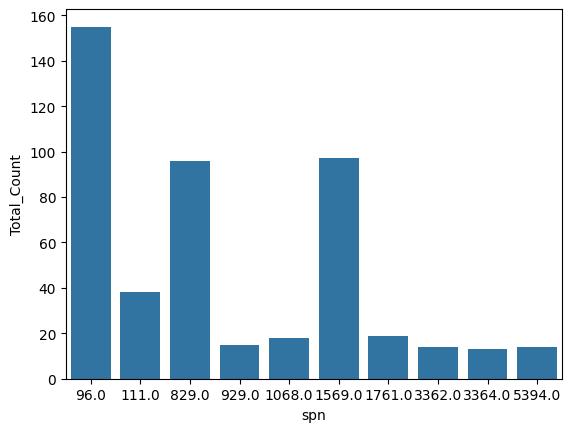

In [29]:
# If you want overall (ignoring TruckID/Event), just group by Code:
overall_code_counts = early_warnings.groupby('spn').size().reset_index(name='Total_Count')

# Sort by highest count
overall_code_counts = overall_code_counts.sort_values('Total_Count', ascending=False)

top_codes = overall_code_counts.head(10)
sns.barplot(data=top_codes, x='spn', y='Total_Count')

### Lets pass this unquie spm and fmi combination to main set and mark them as derate indicators.

In [30]:
derate_codes = sfc2[['spn','fmi']].drop_duplicates()
derate_codes.sort_values(by='spn',ascending=True)
#drop spn 111 and fmi 17,18
derate_codes = derate_codes[~((derate_codes['spn'] == 111) & (derate_codes['fmi'].isin([17,18])))]

### Grab the selected columns for target data sets

In [31]:
faults_target_data = faults_targetted[['RecordID','EquipmentID','EventTimeStamp','spn','fmi','active','AcceleratorPedal','BarometricPressure','CruiseControlSetSpeed',
'EngineCoolantTemperature','EngineLoad','EngineOilPressure','EngineOilTemperature','EngineRpm','EngineTimeLtd','FuelLevel','FuelLtd','FuelTemperature',
'IgnStatus','IntakeManifoldTemperature','LampStatus','ServiceDistance','Speed','SwitchedBatteryVoltage','Throttle','TurboBoostPressure']]

In [32]:
#faults_target_data.isnull().sum()
#faults_target_data[['RecordID','EquipmentID','EventTimeStamp','spn','fmi','active']]
#faults_target_data.info()
#faults_targetted['EngineLoad'].unique()

### just check few engine data parameters

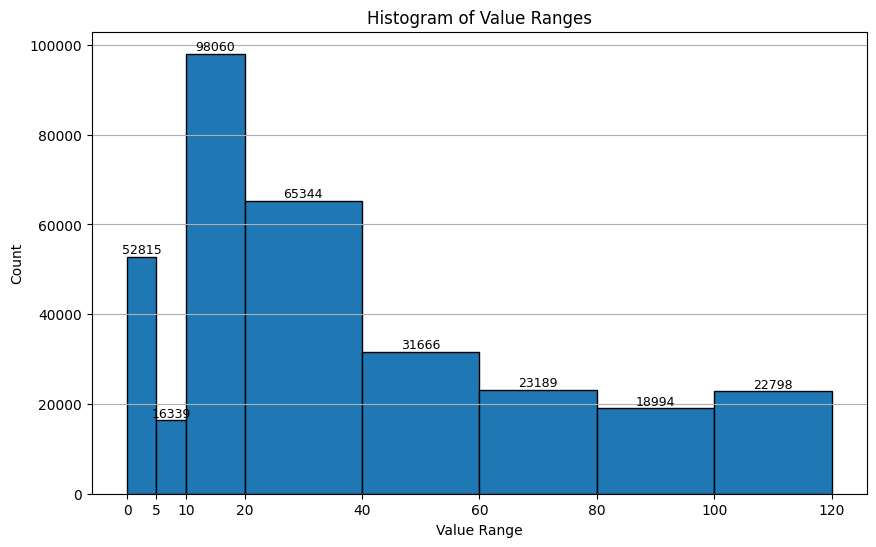

In [33]:
# Step 1: Convert to Series and clean commas
s = pd.Series(faults_targetted['EngineLoad'])
s = s.dropna()
s = s.str.replace(',', '.', regex=False).astype(float)

# Step 2: Define custom bins 
#bins = [0, 50, 100, 120, 160, 190, 220, 250,280,300]
bins = [0, 5, 10, 20, 40, 60, 80, 100,120]

# Step 3: Plot histogram with custom bins
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(s, bins=bins, edgecolor='black')

# Step 4: Annotate bars with counts
for i in range(len(n)):
    plt.text((bins[i] + bins[i+1]) / 2, n[i], str(int(n[i])), 
             ha='center', va='bottom', fontsize=9)

plt.title("Histogram of Value Ranges")
plt.xlabel("Value Range")
plt.ylabel("Count")
plt.grid(axis='y')
plt.xticks(bins)
plt.show()

In [34]:
(derate_codes['spn'].values)

array([ 639,  111,  639,   94, 1761, 1761, 3362, 3251, 3216, 3226, 3482,
        641,   96, 3226, 3361, 3610, 3610, 3556, 4340, 4342, 4765, 3242,
       3246,   91, 3226, 4344,   84,  171, 4094, 4096, 3361, 5394, 5394,
       4334, 4334, 4334, 4364, 3360, 5024, 3031, 1569, 3216, 3364, 3364,
       5848, 5742, 5743, 5745, 3031, 1761, 6802, 1761, 4339,  245,  251,
       4094], dtype=int64)

### Here we will take each row from target data set where event date is < 12/30/2018 and based on the derate_codes, create new column ind_derate = 1 OR 0

In [35]:
def is_derate_codes(row, derate_codes):
    if((row['spn'] in list(derate_codes['spn'].values)) &
       (row['fmi'] in list(derate_codes[derate_codes['spn'] == row['spn']]['fmi'])) &
       (row['active'] == True)
      ):
       return 1
    else:
        return 0

In [36]:
#pass the codes
faults_target_data['is_derate_code'] = faults_target_data.apply(lambda row: is_derate_codes(row, derate_codes), axis=1)

C:\Users\nitin\AppData\Local\Temp\ipykernel_7492\3759071785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faults_target_data['is_derate_code'] = faults_target_data.apply(lambda row: is_derate_codes(row, derate_codes), axis=1)


In [37]:
faults_target_data['is_derate_code'].value_counts()

is_derate_code
0    622448
1     38193
Name: count, dtype: int64

### Now loop through the data and grab all diagnostic data for records where ind_derate = 1 per equipment ID. We will use these as predictors. 

In [38]:
faults_target_data

,RecordID,EquipmentID,EventTimeStamp,spn,fmi,active,AcceleratorPedal,BarometricPressure,CruiseControlSetSpeed,EngineCoolantTemperature,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,is_derate_code
0,1,1439,2015-02-21 10:47:13,111,17,True,0,14.21,66.48672,100.4,...,NaN,False,78.8,1023,NaN,0,3276.75,NaN,0,0
1,2,1439,2015-02-21 11:34:34,629,12,True,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,0
2,3,1369,2015-02-21 11:35:31,1807,2,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,0
3,4,1369,2015-02-21 11:35:33,1807,2,True,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,0
4,5,1674,2015-02-21 11:39:41,4364,17,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730673,1236126,2206,2000-06-08 12:06:28,37,1,True,0,14.355,0,170.6,...,NaN,True,122,50175,NaN,0,NaN,100,0,0
730676,1236129,2206,2000-06-08 12:08:43,37,1,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,50175,NaN,NaN,NaN,NaN,NaN,0
731738,1237840,2175,2011-01-01 00:03:22,5246,16,True,0,14.4275,0,120.2,...,NaN,True,93.2,6143,NaN,0,NaN,100,0,0
731739,1237841,2175,2011-01-01 00:03:23,5246,0,True,0,14.4275,0,120.2,...,NaN,True,93.2,6143,NaN,0,NaN,100,0,0


In [39]:
faults_target_data[faults_target_data['EquipmentID'] == 1366].head(10)

,RecordID,EquipmentID,EventTimeStamp,spn,fmi,active,AcceleratorPedal,BarometricPressure,CruiseControlSetSpeed,EngineCoolantTemperature,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,is_derate_code
22281,36625,1366,2015-04-28 11:46:22,4794,31,True,0,14.2825,66.48672,188.6,...,NaN,True,116.6,17407,NaN,66.95274,3276.75,NaN,16.53,0
22631,37235,1366,2015-04-28 21:27:06,596,31,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,0
27886,45520,1366,2015-05-07 04:06:15,4364,18,True,NaN,NaN,NaN,NaN,...,NaN,True,NaN,17407,NaN,NaN,NaN,NaN,NaN,1
32124,52472,1366,2015-05-14 06:41:15,4364,18,True,0,14.79,66.48672,188.6,...,NaN,True,102.2,17407,NaN,67.02071,3276.75,NaN,11.02,1
33050,54925,1366,2015-05-15 09:57:18,50353,0,True,100,14.7175,66.48672,185,...,NaN,True,116.6,2,NaN,66.99158,3276.75,NaN,10.15,0
33057,54933,1366,2015-05-15 10:00:38,50353,0,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,0
34217,56913,1366,2015-05-17 21:17:07,4364,18,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,0
34523,57314,1366,2015-05-18 09:16:28,50353,0,True,0,14.4275,66.48672,186.8,...,NaN,True,143.6,2,NaN,0,3276.75,NaN,0.29,0
34527,57319,1366,2015-05-18 09:19:44,50353,0,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,0
35029,58135,1366,2015-05-19 00:44:06,50353,0,True,0,14.355,66.48672,186.8,...,NaN,True,132.8,2,NaN,0,3276.75,NaN,0.58,0


In [40]:
faults_target_data = faults_target_data.drop(['LampStatus','ServiceDistance'],axis = 1)

fault_test = faults_target_data.copy()

columns = ['AcceleratorPedal', 'BarometricPressure', 'CruiseControlSetSpeed',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelTemperature', 'IgnStatus', 'IntakeManifoldTemperature',
       'Speed', 'SwitchedBatteryVoltage', 'Throttle', 'TurboBoostPressure']

for col in columns:

    fault_test[col] = pd.to_numeric(fault_test[col], errors='coerce')


    fault_test[col] = fault_test.groupby('EquipmentID')[col].transform(
        lambda x: x.fillna(x.mean())
    )


    fault_test[col] = fault_test[col].fillna(fault_test[col].mean())

In [41]:
fault_test[fault_test['EquipmentID'] == 1366].head(10)

,RecordID,EquipmentID,EventTimeStamp,spn,fmi,active,AcceleratorPedal,BarometricPressure,CruiseControlSetSpeed,EngineCoolantTemperature,...,FuelLevel,FuelLtd,FuelTemperature,IgnStatus,IntakeManifoldTemperature,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,is_derate_code
22281,36625,1366,2015-04-28 11:46:22,4794,31,True,0.000000,14.282500,66.486720,188.600000,...,63.710614,74868.604999,36.52609,NaN,116.600000,66.952740,3276.75,67.267382,16.530000,0
22631,37235,1366,2015-04-28 21:27:06,596,31,False,11.174775,14.467854,62.053152,183.454717,...,63.710614,80073.865218,36.52609,NaN,119.064865,30.836007,3276.75,67.267382,6.177547,0
27886,45520,1366,2015-05-07 04:06:15,4364,18,True,11.174775,14.467854,62.053152,183.454717,...,63.710614,80073.865218,36.52609,NaN,119.064865,30.836007,3276.75,67.267382,6.177547,1
32124,52472,1366,2015-05-14 06:41:15,4364,18,True,0.000000,14.790000,66.486720,188.600000,...,63.710614,75772.073417,36.52609,NaN,102.200000,67.020710,3276.75,67.267382,11.020000,1
33050,54925,1366,2015-05-15 09:57:18,50353,0,True,100.000000,14.717500,66.486720,185.000000,...,63.710614,75862.156087,36.52609,NaN,116.600000,66.991580,3276.75,67.267382,10.150000,0
33057,54933,1366,2015-05-15 10:00:38,50353,0,False,11.174775,14.467854,62.053152,183.454717,...,63.710614,80073.865218,36.52609,NaN,119.064865,30.836007,3276.75,67.267382,6.177547,0
34217,56913,1366,2015-05-17 21:17:07,4364,18,False,11.174775,14.467854,62.053152,183.454717,...,63.710614,80073.865218,36.52609,NaN,119.064865,30.836007,3276.75,67.267382,6.177547,0
34523,57314,1366,2015-05-18 09:16:28,50353,0,True,0.000000,14.427500,66.486720,186.800000,...,63.710614,75961.616864,36.52609,NaN,143.600000,0.000000,3276.75,67.267382,0.290000,0
34527,57319,1366,2015-05-18 09:19:44,50353,0,False,11.174775,14.467854,62.053152,183.454717,...,63.710614,80073.865218,36.52609,NaN,119.064865,30.836007,3276.75,67.267382,6.177547,0
35029,58135,1366,2015-05-19 00:44:06,50353,0,True,0.000000,14.355000,66.486720,186.800000,...,63.710614,76065.964825,36.52609,NaN,132.800000,0.000000,3276.75,67.267382,0.580000,0


### Delete ALL rows with 5246 spn

In [42]:
fault_test.shape

(660641, 25)